# Last version of JuliaSet


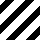
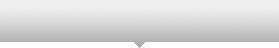
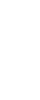
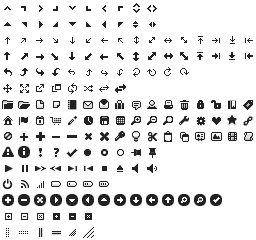
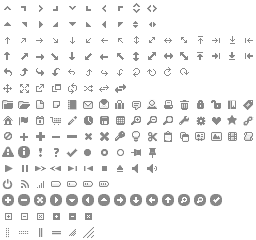
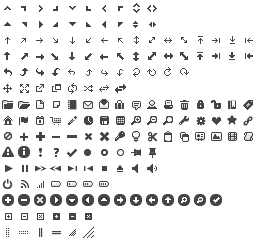
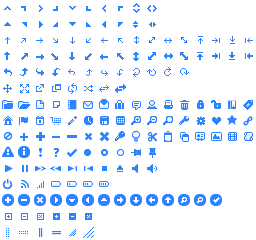
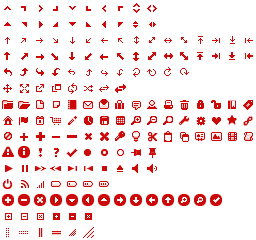
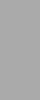
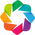
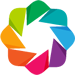
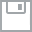
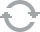
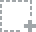
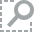
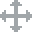
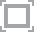
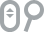

In [13]:
# Math libraries
import numpy as np
from math import sqrt

# Matplotlib plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

# Bokeh plotting libraries
import bokeh.plotting as blt
blt.output_notebook()

In [2]:
class JuliaSet(object):

    def __init__(self,c,n=100):
        self.c = c
        self.n = n
        self._d = 0.001
        self._complexplane = np.array([])
        self.set = np.array([])

    def juliamap(self,z):
        return z**2 + self.c

    def iterate(self,z):
        m=0
        while True:
            z=self.juliamap(z)
            m=m+1
            if abs(z)>2:
                return m
            if m>=self.n:
                return 0

    def set_spacing(self,d,l_inf=-2,l_sup=2):
        self._d=d
        self.l_inf = l_inf
        self.l_sup = l_sup
        t=np.arange(self.l_inf,self.l_sup,self._d)
        x,y=np.meshgrid(t,t)
        self._complexplane=x+y*1j

    def generate(self):
        iterate_vector=np.vectorize(self.iterate)
        self.set=iterate_vector(self._complexplane)
        return self.set

In this last version of JuliaSet, the implementation of 'set_spacing' has changed. Instead of creating 'complexplane' element by element, now 'set_spacing' prepares the matrix x with repetitions of the vector composed by the elements of the "arange" and its transposed matrix y. After this, the method sums x and 1j times y. It produces a more efficient algorithm.

Another change in that method is the creation of the variables l_inf and l_sup, that allows the alteration of the inferior and superior limits for the range. Because of this, some parts of the class JuliaSetPlot were modified, replacing the fixed limits -2 and 2 for the new variables.

The last modification was made in the method 'generate' with the vectorization of the function 'iterate'. This change is not related to the efficience of the algorithm, but it helps to get a cleaner code.

In [3]:
class JuliaSetPlot(JuliaSet):
    """Extend JuliaSet to add plotting functionality"""
    
    def __init__(self, *args, **kwargs):
        # Invoke constructor for JuliaSet first, unaltered
        super(JuliaSetPlot, self).__init__(*args, **kwargs)
        # Add one more attribute: a rendered image array
        self.img = np.array([])
    
    def get_dim(self):
        # get what should be an attribute
        return int(sqrt(self.img.size)) #int(4.0 / self._d)
    
    def render(self):
        if not self.set: self.generate()
        # Convert inefficient list to efficient numpy array
        self.img = np.array(self.set)
        dim = self.get_dim()
        # Reshape array into a 2d complex plane
        self.img = np.reshape(self.img, (dim,dim)).T
        
    def show(self):
        if not self.img.size: self.render()
        # Specify complex plane axes efficiently
        xy = np.linspace(self.l_inf,self.l_sup,self.get_dim())
        # Use matplotlib to plot image as an efficient mesh
        plt.figure(1, figsize=(12,9))
        plt.pcolormesh(xy,xy,self.img, cmap=plt.cm.hot)
        plt.colorbar()
        plt.show()
        
    def interact(self):
        from matplotlib.colors import rgb2hex
        if not self.img.size: self.render()
        # Mimic matplotlib "hot" color palette
        colormap = plt.cm.get_cmap("hot")
        bokehpalette = [rgb2hex(m) for m in colormap(np.arange(colormap.N))]
        # Use bokeh to plot an interactive image
        f = blt.figure(x_range=[self.l_inf,self.l_sup], y_range=[self.l_inf,self.l_sup], plot_width=600, plot_height=600)
        f.image(image=[j.img], x=[self.l_inf], y=[self.l_inf], dw=[self.l_sup-self.l_inf], dh=[self.l_sup-self.l_inf], palette=bokehpalette)
        blt.show(f)

# Some examples of plots

It was not expected symmetry between the axes, but in order to evidence it, one can analyse the following four plots:

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 14.1 ms
667
25.8263431403


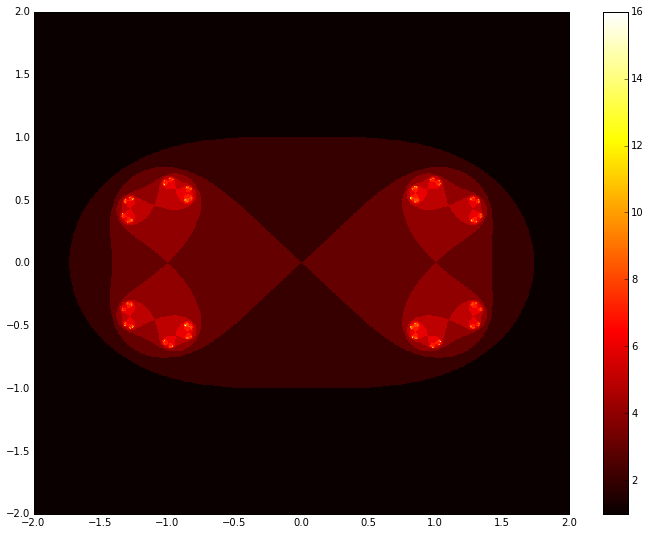

CPU times: user 2.67 s, sys: 164 ms, total: 2.84 s
Wall time: 4.2 s


In [20]:
j = JuliaSetPlot(1)
%time j.set_spacing(0.006)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 7.54 ms
667
25.8263431403


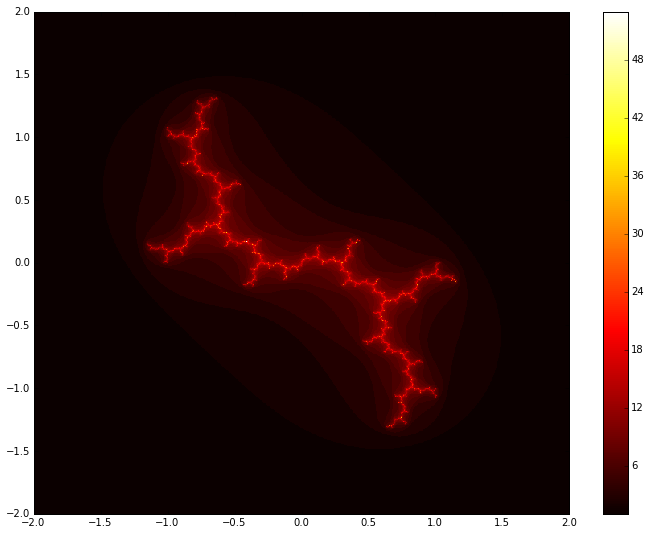

CPU times: user 2.36 s, sys: 292 ms, total: 2.66 s
Wall time: 3.43 s


In [9]:
j = JuliaSetPlot(1j)
%time j.set_spacing(0.006)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 35.6 ms
667
25.8263431403


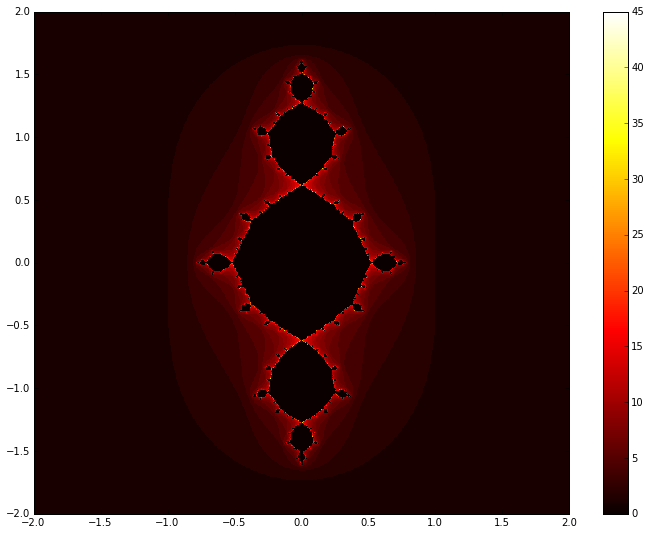

CPU times: user 6.65 s, sys: 0 ns, total: 6.65 s
Wall time: 17.7 s


In [17]:
j = JuliaSetPlot(-1)
%time j.set_spacing(0.006)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 24 ms, sys: 72 ms, total: 96 ms
Wall time: 10.2 s
667
25.8263431403


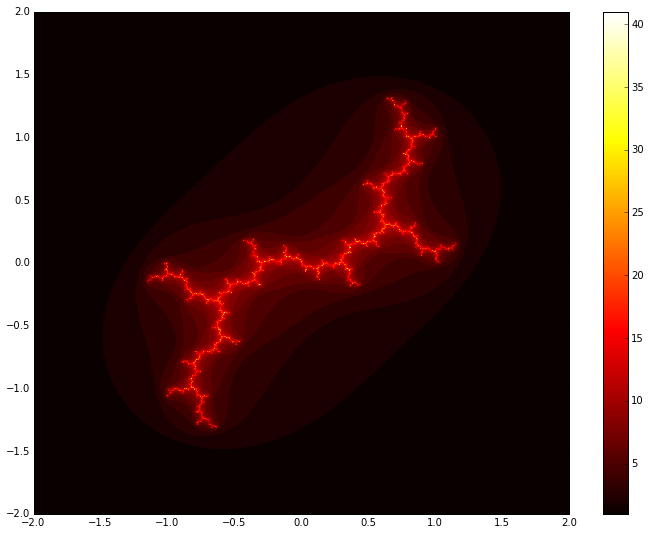

CPU times: user 2.72 s, sys: 168 ms, total: 2.89 s
Wall time: 16.6 s


In [16]:
j = JuliaSetPlot(-1j)
%time j.set_spacing(0.006)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

(Why are the plots for c=1 and c=-1 so differents from each other?)

It could be interesting to check if there is some kind of symmetry in the axes rotated by $\pi/4$:

CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 6.63 ms
667
25.8263431403


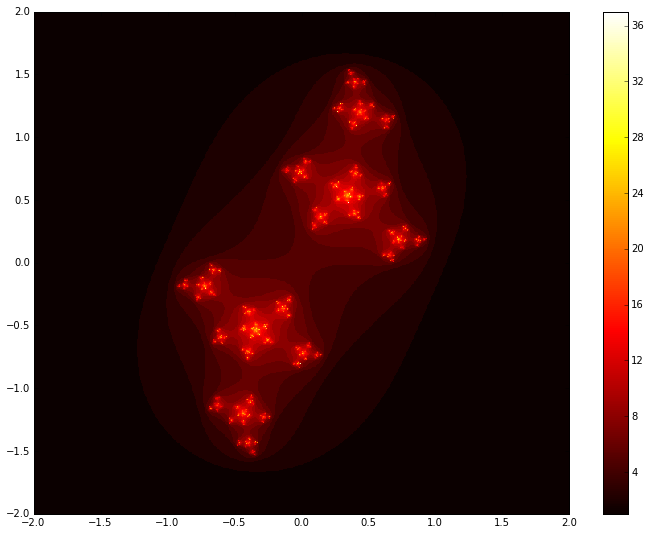

CPU times: user 2.16 s, sys: 284 ms, total: 2.45 s
Wall time: 2.8 s


In [13]:
j = JuliaSetPlot(-1/sqrt(2) - (1/sqrt(2))*1j)
%time j.set_spacing(0.006)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 9.34 ms
667
25.8263431403


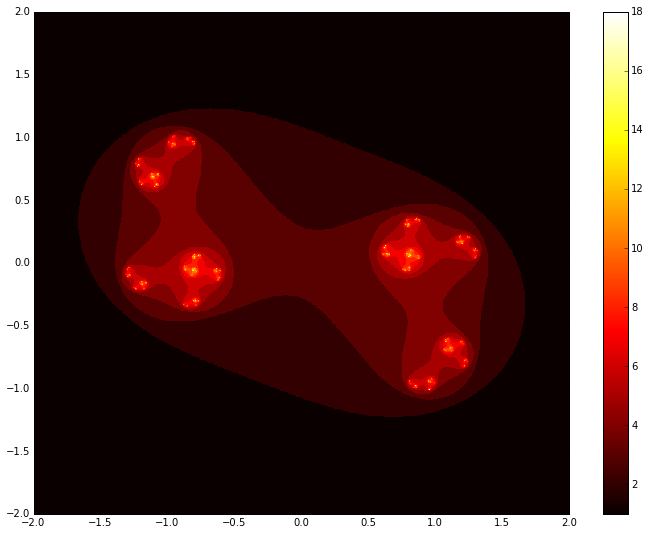

CPU times: user 2.56 s, sys: 292 ms, total: 2.85 s
Wall time: 3 s


In [12]:
j = JuliaSetPlot(1/sqrt(2) + (1/sqrt(2))*1j)
%time j.set_spacing(0.006)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 23.2 ms
667
25.8263431403


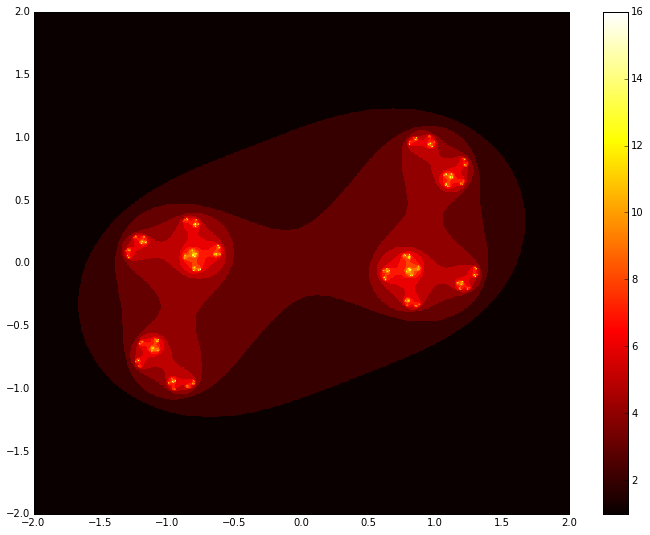

CPU times: user 2.49 s, sys: 36 ms, total: 2.52 s
Wall time: 9.98 s


In [18]:
j = JuliaSetPlot(1/sqrt(2) - (1/sqrt(2))*1j)
%time j.set_spacing(0.006)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 17.5 ms
667
25.8263431403


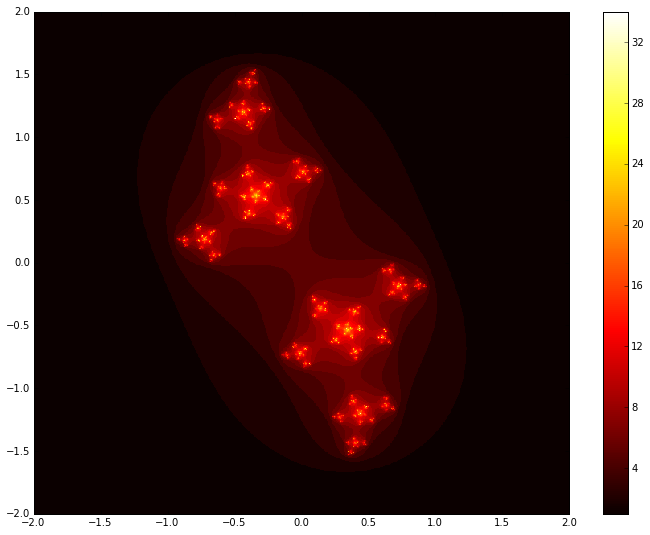

CPU times: user 2.78 s, sys: 100 ms, total: 2.88 s
Wall time: 8.65 s


In [19]:
j = JuliaSetPlot(-1/sqrt(2) + (1/sqrt(2))*1j)
%time j.set_spacing(0.006)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

The following two plots were used to analyse the stability of the solution for imaginary entrances:

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs
1667
40.8289113252


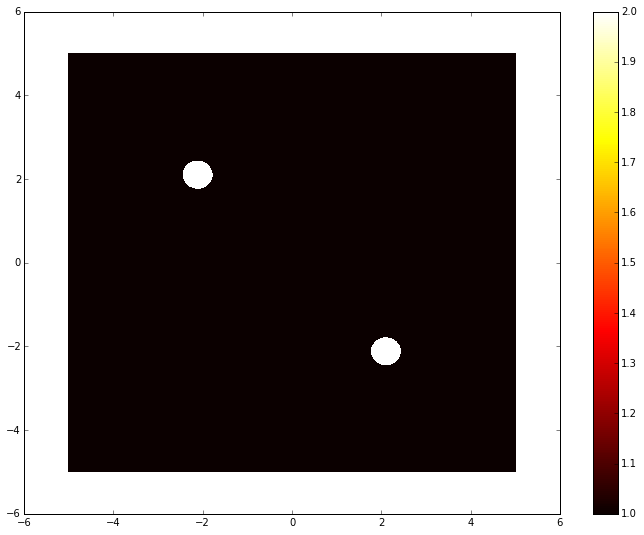

CPU times: user 10.2 s, sys: 2.44 s, total: 12.6 s
Wall time: 23.9 s


In [4]:
j = JuliaSetPlot(9j)
%time
j.set_spacing(0.006,-5,5)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
1667
40.8289113252


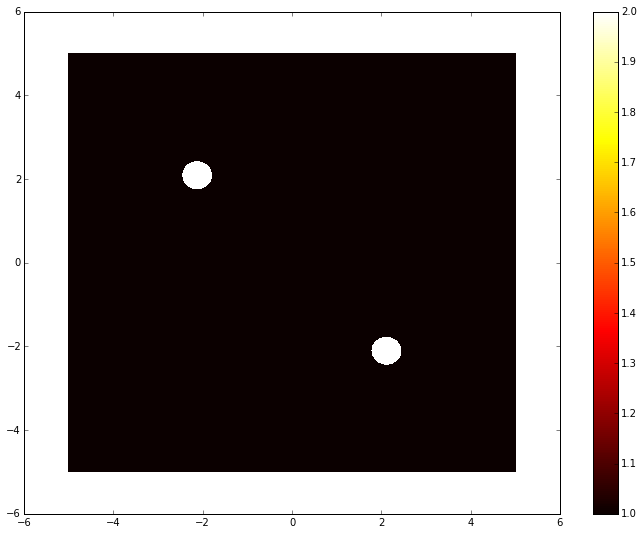

CPU times: user 10.3 s, sys: 2.75 s, total: 13 s
Wall time: 22.6 s


In [5]:
j = JuliaSetPlot(0.1+9j)
%time
j.set_spacing(0.006,-5,5)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

It is very interesting to observe the behavior of the following plots too:

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 26.9 µs
3334
57.740800133


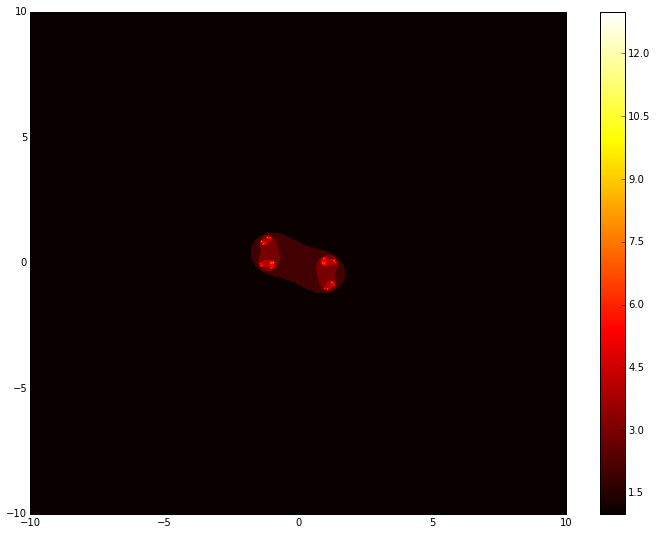

CPU times: user 38 s, sys: 10.4 s, total: 48.4 s
Wall time: 6min


In [15]:
j = JuliaSetPlot(1+1j)
%time
j.set_spacing(0.006,-10,10)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs
3334
57.740800133


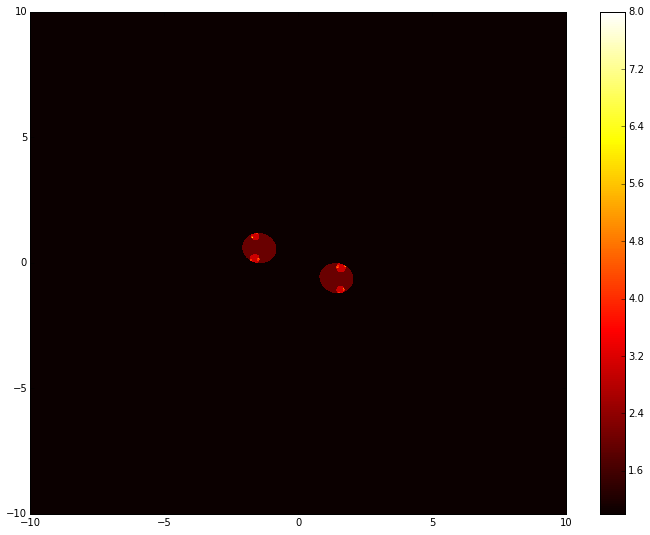

CPU times: user 30.3 s, sys: 4.66 s, total: 35 s
Wall time: 4min 43s


In [5]:
j = JuliaSetPlot(2+2j)
%time
j.set_spacing(0.006,-10,10)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16 µs
3334
57.740800133


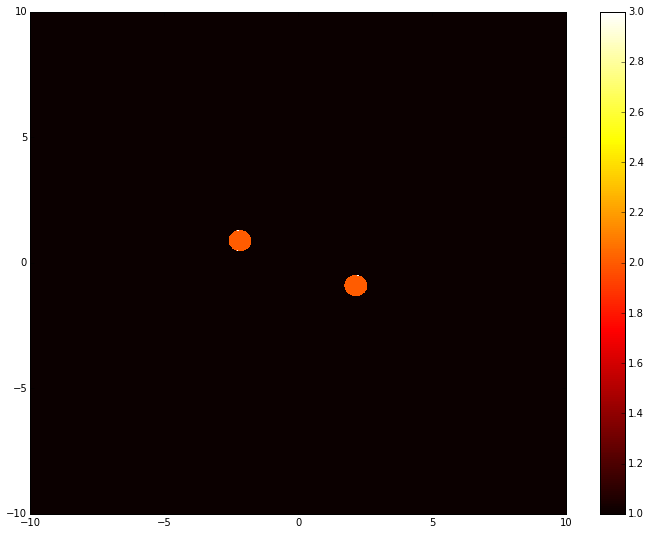

CPU times: user 33.5 s, sys: 24.8 s, total: 58.3 s
Wall time: 3min 4s


In [8]:
j = JuliaSetPlot(4+4j)
%time
j.set_spacing(0.006,-10,10)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
3334
57.740800133


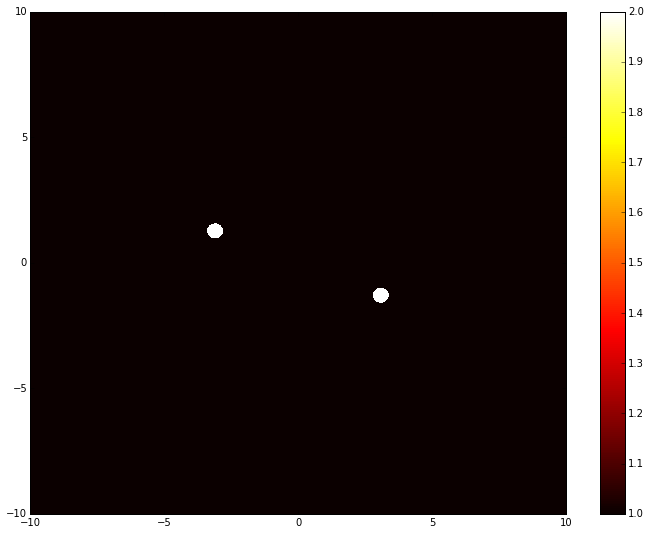

CPU times: user 39.6 s, sys: 9.02 s, total: 48.6 s
Wall time: 2min 37s


In [7]:
j = JuliaSetPlot(8+8j)
%time
j.set_spacing(0.006,-10,10)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs
3334
57.740800133


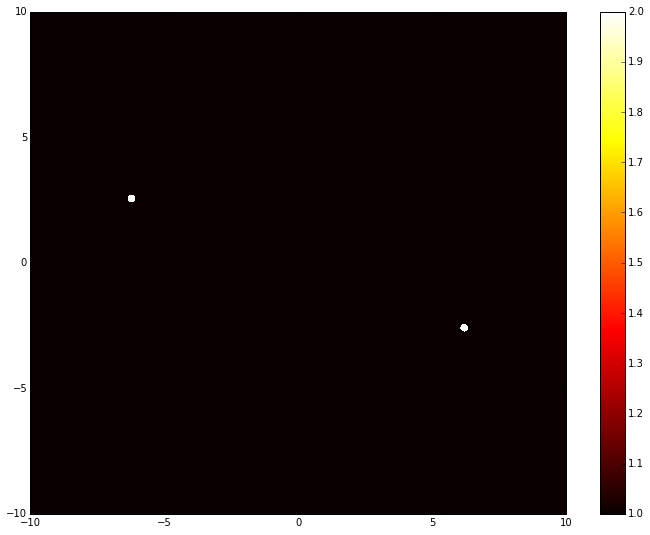

CPU times: user 39.4 s, sys: 5.68 s, total: 45.1 s
Wall time: 3min 5s


In [8]:
j = JuliaSetPlot(32+32j)
%time
j.set_spacing(0.006,-10,10)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
3334
57.740800133


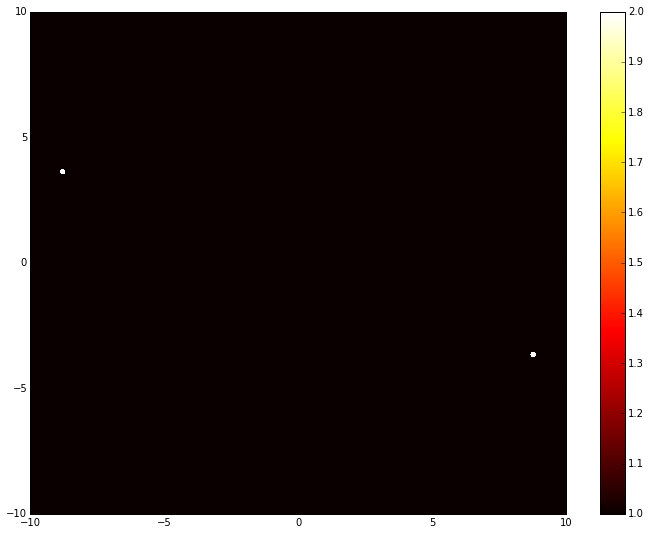

CPU times: user 40.7 s, sys: 5 s, total: 45.7 s
Wall time: 4min 26s


In [14]:
j = JuliaSetPlot(64+64j)
%time
j.set_spacing(0.006,-10,10)
print len(j._complexplane)
print sqrt(len(j._complexplane))
%time j.show()